In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_df = pd.read_json("../data/webquestions/webquestions-train.json")
dev_df = pd.read_json("../data/webquestions/webquestions-dev.json")
merged_df = pd.read_parquet("../data/webquestions/webquestions-merged.parquet")

print(f"train: {len(train_df)}")
print(f"dev: {len(dev_df)}")
print(f"test: {len(merged_df)}")

for label in ["in", "near-ood", "far-ood"]:
    count = (merged_df["labels"] == label).sum()
    print(f"test {label}: {count}")


print(train_df["question"].apply(lambda q: len(q.split())).describe())
print(train_df["answers"].apply(lambda a: len(a[0].split())).describe())

train: 2474
dev: 278
test: 1423
test in: 271
test near-ood: 299
test far-ood: 853
count    2474.000000
mean        6.631770
std         1.594261
min         3.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        14.000000
Name: question, dtype: float64
count    2474.000000
mean        2.033145
std         1.084255
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        10.000000
Name: answers, dtype: float64


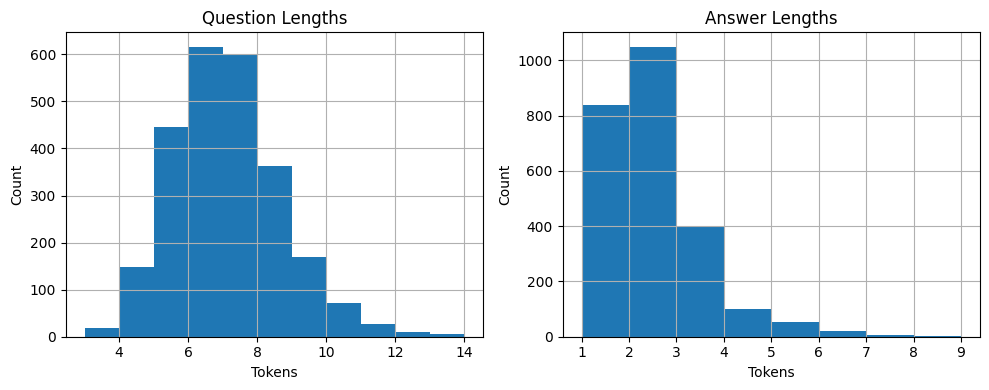

In [3]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
train_df["question"].apply(lambda q: len(q.split())).hist(ax=axes[0], bins=range(3, 15, 1))
axes[0].set_title("Question Lengths")
axes[0].set_xlabel("Tokens")
axes[0].set_ylabel("Count")

train_df["answers"].apply(lambda a: len(a[0].split())).hist(ax=axes[1], bins=range(1, 10, 1))
axes[1].set_title("Answer Lengths")
axes[1].set_xlabel("Tokens")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [9]:
# fig, axes = plt.subplots(1, 1, figsize=(10, 4))
train_df["answers"].apply(lambda a: len(a)).describe()
# axes.set_title("Answer Lengths")
# axes.set_xlabel("Tokens")
# axes.set_ylabel("Count")

# plt.tight_layout()
# plt.show()

count    2474.000000
mean        2.517785
std         2.783589
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        17.000000
Name: answers, dtype: float64